In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
from numpy import mean
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
def r2_oos(y_true, y_pred, sample_weight=None):
    if sample_weight is not None:
        weight = sample_weight[:, np.newaxis]
    else:
        weight = 1.
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
                                                      dtype=np.float64)
    denominator = (weight * (y_true) ** 2).sum(axis=0,
                                                    dtype=np.float64)
   
    
    output_scores = 1 - (numerator / denominator)

    return output_scores

def recur_eval_dataset(dataset, year_start, year_stop):
    n = year_start + 12
    while n <= year_stop:
        train = dataset[dataset['DATE'] < year_start * 10000 + 101]
        vali = dataset[(dataset['DATE'] < n * 10000 + 101) & (dataset['DATE'] > year_start * 10000 + 101)]
        test = dataset[(dataset['DATE'] < (n + 1) * 10000 + 101) & (dataset['DATE'] > n * 10000 + 101)]
        yield train, vali, test
        year_start += 1
        n = year_start + 12

In [3]:
df = pd.read_csv('1957_2016.csv')
df = df.iloc[:, 2:]
df.dropna(inplace=True)
df.head()

,DATE,mvel1,RET,prc,SHROUT,beta,betasq,chmom,dolvol,idiovol,...,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,bm,bm_ia
4,19570329,35250.00,-0.017730,69.25,500,1.229520,1.511719,-0.102811,8.421013,0.025453,...,0.007661,2.386914e-07,0.007194,0.006748,0.889503,0.775954,6.631579e+00,35.0,1.125553,0.762989
23,19570329,283036.00,0.057692,55.00,5443,1.806498,3.263435,0.006612,10.459776,0.019643,...,0.016233,7.592996e-08,0.022167,0.012118,0.421592,0.226673,2.443123e-07,33.0,0.650905,-0.584311
25,19570329,2670133.50,0.014799,177.75,62893,0.389741,0.151898,0.019737,11.948152,0.006526,...,0.005598,2.747520e-09,0.009972,0.004336,0.320722,0.034650,1.202819e-06,48.0,0.544756,-0.238968
28,19570329,17994.25,0.134132,46.75,431,0.677784,0.459391,-0.113021,8.688643,0.030575,...,0.007412,4.835197e-07,0.009036,0.010821,0.779174,0.746046,1.105263e+00,38.0,0.805466,0.225861
30,19570329,48112.50,0.020000,38.25,1283,0.948980,0.900563,-0.194429,9.489297,0.025403,...,0.012026,2.513525e-07,0.019231,0.011344,0.694251,0.744191,1.200925e-07,33.0,0.925097,0.138460


In [4]:
score = []
imp = 0
for train, vali, test in recur_eval_dataset(df, 1975, 1987):
    x = train.iloc[:, 1:].drop(columns='RET')
    y = train.iloc[:, 2]
    model = GradientBoostingRegressor()
    model.fit(x, y)
    val_x = vali.iloc[:, 1:].drop(columns='RET')
    val_y = vali.iloc[:, 2]
    predict_val = model.predict(val_x)
    print('---------')
    r2_oos(val_y.values, predict_val)
    test_x = test.iloc[:, 1:].drop(columns='RET')
    test_y = test.iloc[:, 2]
    predict_test = model.predict(test_x)
    score.append(r2_oos(test_y.values, predict_test))
    imp = model.feature_importances_
mean(score)

GradientBoostingRegressor()

---------


0.41122318208182296

0.3544068179487735

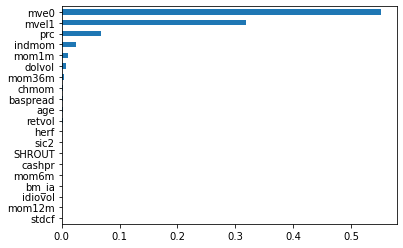

In [5]:
X = df.iloc[:, 1:].drop(columns='RET').columns
feat_importances = pd.Series(imp, index=X)
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()

In [4]:
score = []
for train, vali, test in recur_eval_dataset(df, 1975, 2016):
    x = train.iloc[:, 1:].drop(columns='RET')
    y = train.iloc[:, 2]
    model = GradientBoostingRegressor()
    model.fit(x, y)
    val_x = vali.iloc[:, 1:].drop(columns='RET')
    val_y = vali.iloc[:, 2]
    predict_val = model.predict(val_x)
    print('---------')
    r2_oos(val_y.values, predict_val)
    test_x = test.iloc[:, 1:].drop(columns='RET')
    test_y = test.iloc[:, 2]
    predict_test = model.predict(test_x)
    score.append(r2_oos(test_y.values, predict_test))
mean(score)

GradientBoostingRegressor()

---------


0.41141079374205125

GradientBoostingRegressor()

---------


0.4220926635218373

GradientBoostingRegressor()

---------


0.4246747871149794

GradientBoostingRegressor()

---------


0.3833901562168921

GradientBoostingRegressor()

---------


0.3753180024376125

GradientBoostingRegressor()

---------


0.43762257128272497

GradientBoostingRegressor()

---------


0.45254211705343983

GradientBoostingRegressor()

---------


0.4383756142005599

GradientBoostingRegressor()

---------


0.4496255675298746

GradientBoostingRegressor()

---------


0.43952977746607413

GradientBoostingRegressor()

---------


0.44323546725749696

GradientBoostingRegressor()

---------


0.44174339748158054

GradientBoostingRegressor()

---------


0.42653225382221316

GradientBoostingRegressor()

---------


0.4147046287586442

GradientBoostingRegressor()

---------


0.3958492555338665

GradientBoostingRegressor()

---------


0.3859504974874792

GradientBoostingRegressor()

---------


0.36527960591443753

GradientBoostingRegressor()

---------


0.3533290557045444

GradientBoostingRegressor()

---------


0.35433387901983326

GradientBoostingRegressor()

---------


0.34761046568310594

GradientBoostingRegressor()

---------


0.35461216787314775

GradientBoostingRegressor()

---------


0.35220353943554306

GradientBoostingRegressor()

---------


0.3452976114378026

GradientBoostingRegressor()

---------


0.33925560083529993

GradientBoostingRegressor()

---------


0.3618897753195345

GradientBoostingRegressor()

---------


0.3726476276666889

GradientBoostingRegressor()

---------


0.40374247492058546

GradientBoostingRegressor()

---------


0.39740082959141954

GradientBoostingRegressor()

---------


0.388593329597667

GradientBoostingRegressor()

---------


0.40100987665561894

0.33529062098133994